# Curve Fitting

Suppose that you want to fit a set of data points $(x_i,y_i)$, where
$i = 1,2,\ldots,N$, to a function that can't be linearized. For example, the function could be a second-order polynomial, $f(x,a,b,c)=ax^2+bx+c$. There isn’t an analytical expression for finding the best-fit parameters ($a$, $b$, and $c$ in this example) as there is for linear regression with uncertainties in one dimension. The usual approach is to optimize the parameters to minimize the sum of the squares of the differences between the data and the function. How the difference are defined varies.  If there are only uncertainties in the <i>y</i> direction, then the differences in the vertical direction (the gray lines in the figure below) are used.  If there are uncertainties in both the $x$ and $y$ directions, the orthogonal (perpendicular) distances from the line (the dotted red lines in the figure below) are used.

<center><img src="https://blog.rtwilson.com/wp-content/uploads/2015/11/Normal_vs_ODR.png" width=500><br>
Image from <a href="http://blog.rtwilson.com/orthogonal-distance-regression-in-python/">http://blog.rtwilson.com/orthogonal-distance-regression-in-python/</a> </center>

For the case where there are only uncertainties in the <i>y</i> direction, if the uncertainty in $y_i$ is $\sigma_i$, then the difference squared for each point is weighted by $w_i=1/\sigma_i^2$. If there are no uncertainties, each point is given an equal weight of one and the results should be used with caution. The function to be minimized with 
respect to variations in the parameters is
$$
\chi^2 = \sum_{i=1}^N w_i \left[y_i - f\left(x_i,a,b,c\right)\right]^2.
$$  
For the case where there are uncertainties in both $x$ and $y$, the function to be minimized is more complicated.  

The **general_fit** function that performs this minimization is defined in the file ["fitting.py"](https://cocalc.com/share/public_paths/0f75616b87f2d01d98d07355ba587a85b9a053aa) which must be in the same drectory as the Python program. If there are only uncertainties in the $y$ direction, it uses the **curve_fit** function from the "scipy" library to find the best-fit parameters.  If there are uncertainties in both $x$ and $y$, the **odr** package from the "scipy" library is used.

An example of performing a fit with uncertainties in only the $y$ direction is shown below. The first command imports the **general_fit** function. Second, the function (**fitfunc**) to be fit is defined. The function could have more than 3 parameters. Inital guesses at the parameters are placed in the list $p0$. The name of the fitting function, arrays containing the data points ($x$ and $y$), the initial guesses at the parameters, and  an array of uncertainties ($yerr$) are sent to the **general_fit** function. If it succeeds, the **general_fit** function returns arrays with the optimal parameters and estimates of their uncertainties (in lists called $popt$ and $punc$), the reduced chi squared ($rchi2$), and the degrees of freedom  ($dof$). 

In [3]:
from fitting import *
import pylab as pl

# Define the fitting function
def fitfunc(x, a, b, c):
    return (a*x**2 + b*x + c)

x = pl.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = pl.array([-1.78, 4.09, 8.85, 17.9, 26.1, 35.2])
yerr = pl.array([1.24, 1.46, 1.05, 1.68, 1.18, 1.56])

p0 = [1.0, 3.0, -2.0]
popt, punc, rchi2, dof = general_fit(fitfunc, x, y, p0, yerr)
print('optimal parameters: ', popt)
print('uncertainties of parameters: ', punc)

results of general_fit:
   degrees of freedom =  3
   reduced chi squared =  0.3960236768747382
optimal parameters:  [ 0.59883841  4.47445632 -1.7310894 ]
uncertainties of parameters:  [0.13760793 0.69552672 0.72598714]


For this example, the optimal parameter are

$$ a = 0.59883841\\
   b = 4.47445632\\
   c = -1.7310894 $$

and their uncertainties are

$$ \sigma_a = 0.13760793 \\
   \sigma_b = 0.69552672  \\
   \sigma_c = 0.72598714 $$

If the initial guesses at the parameters are not reasonable, the optimization may fail. It is often helpful to plot the data first to help make a good guesses at the parameters.

If your performing a  fit with uncertainties in both the $x$ and $y$ direction, arrays containing the data points ($x$ and $y$) and their uncertainties ($yerr$ and $xerr$) are sent to the **general_fit** function as follows:  

<pre>
popt, punc, rchi2, dof = general_fit(fitfunc, x, y, p0, yerr, xerr)
</pre>

Note the order of the uncertainties!  The uncertainty in $x$ is optional, so it is second.  This is also consistent with the **errorbar** function.

## Intrepeting the Results

Plotting data with error bars and a best-fit function together gives some idea of whether or not the fit is good. If the curve passes within most of the error bars, the fit is probably reasonably good. The first line below makes a list of 100 points between the minimum and maximum values of $x$ in the data. In the second line below, all of the parameters are sent to the fitting function at once using a pointer (using an asterisk in front of the name).

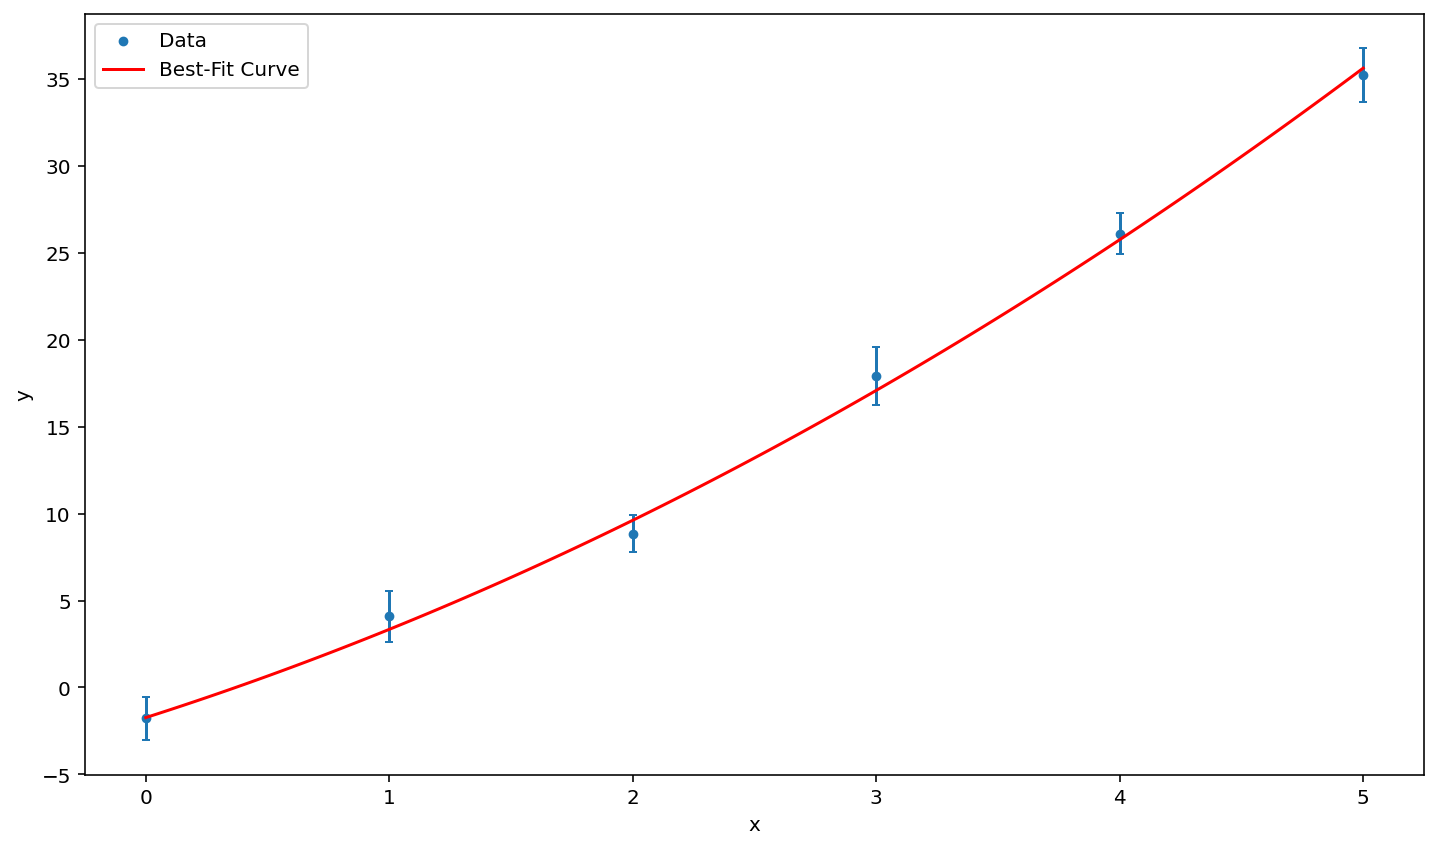

In [4]:
xf = pl.linspace(min(x),max(x),100)
yf = fitfunc(xf,*popt)

pl.figure()
pl.scatter(x,y,s=15,label='Data')
pl.errorbar(x, y, yerr, ls='None', capsize=2)
pl.plot(xf,yf,"r-",label='Best-Fit Curve')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='upper left')
pl.show()

The reduced chi squared and the degrees of freedom can also be used to judge the goodness of the fit. If $N$ is the number of data points and $C$ is
the number of parameters (or constraints) in the fit, the number degrees of freedom is 
$$
d = N - C.
$$
In the example, $C = 3$ because there three parameters in the function. The reduced chi squared is defined as
$$
\tilde{\chi}^{\, 2} = \frac{\chi^2}{d}.
$$
According to Taylor (p. 271), “If we obtain a value of $\tilde{\chi}^{\, 2}$ of order one or less, then we have no reason to doubt our expected distribution; if we obtain a value of $\tilde{\chi}^{\, 2}$ much larger than one, our expected distribution is unlikely to be correct.”  
For an observed value (from fitting data) of the reduced chi square ($\tilde{\chi}^{\, 2}_o$), you can look up the probability of randomly getting a larger $\tilde{\chi}^{\, 2}$ with $d$ degrees of freedom on the table below (from Appendix D of Taylor’s book). A typical standard is to reject a fit if 
$$
Prob_d\left(\tilde{\chi}^{\, 2} \ge \tilde{\chi}^{\, 2}_o \right) < 5\%.
$$
In other words, if the reduced chi squared for a fit is unlikely to occur randomly, then the fit is not a good one.  
In the example above, six data points are fit and $\tilde{\chi}^{\, 2}_o = 0.39$. Since $d = 6 - 3 = 3$, the table gives
$$
Prob_d\left(\tilde{\chi}^{\, 2} \ge \tilde{\chi}^{\, 2}_o \right) \approx 75\%,
$$
and there is no reason to reject the fit.

<center>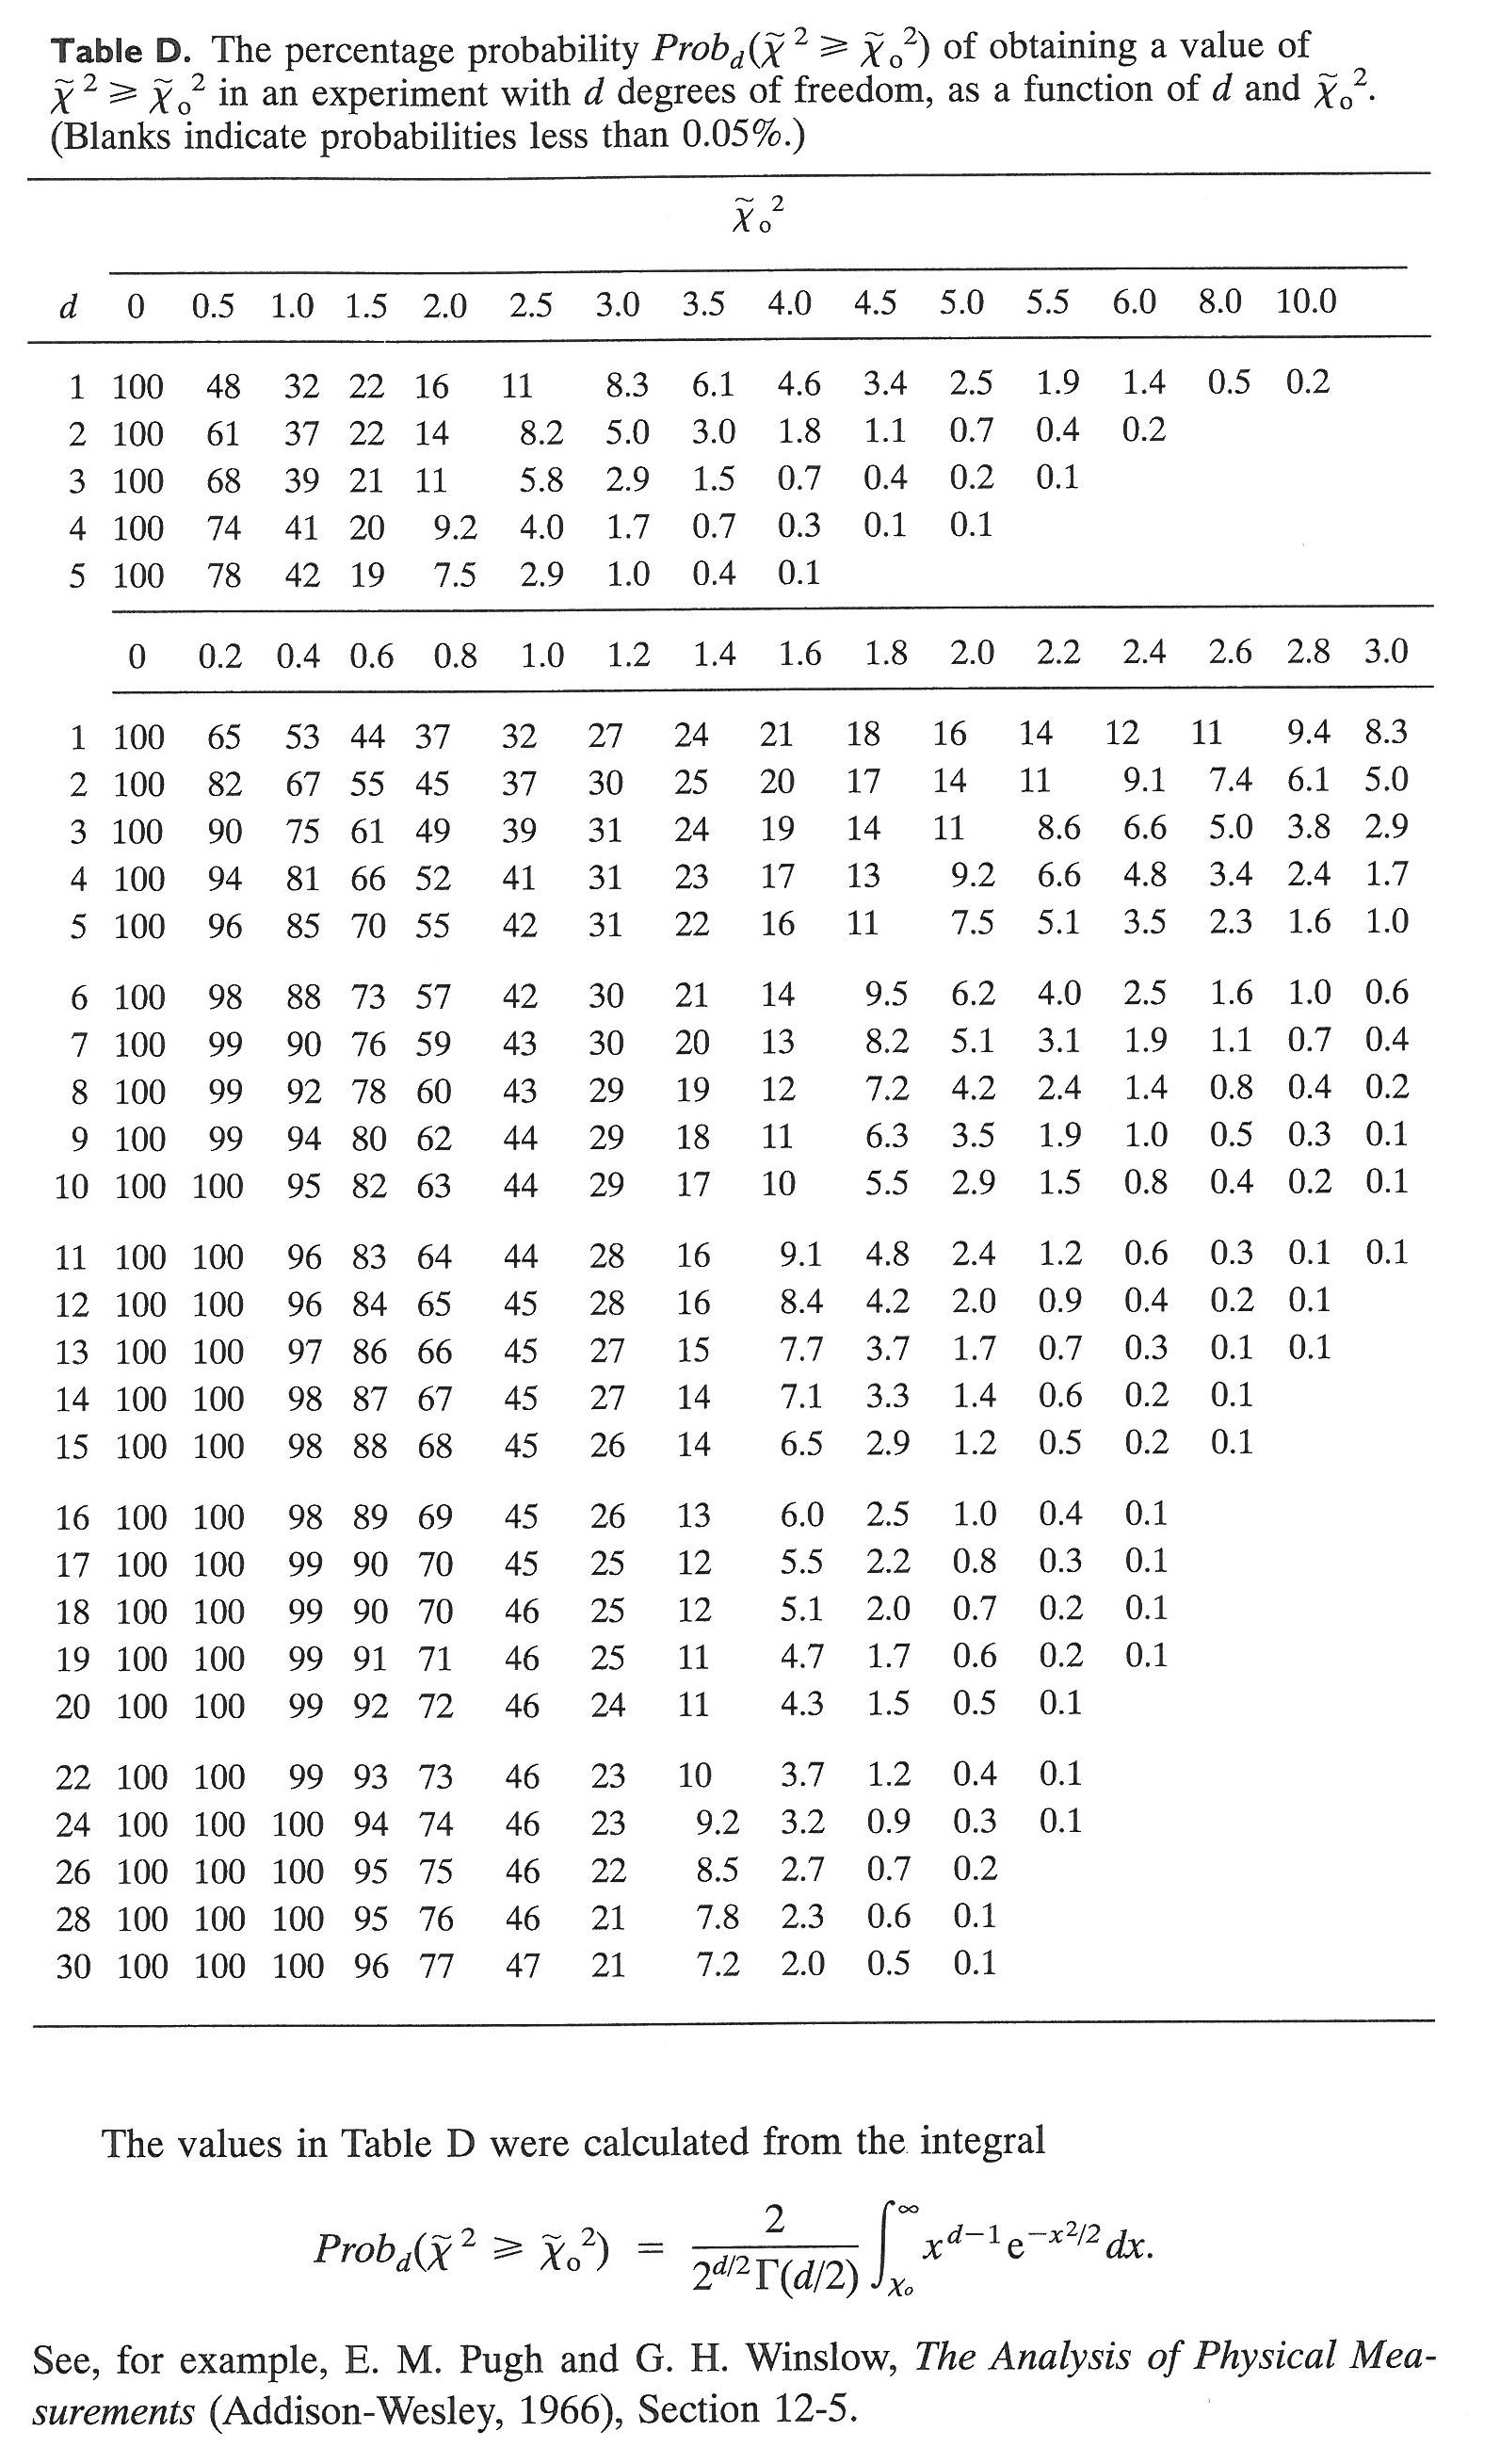<br>
  From <i>Error Analysis</i> by John Taylor</center>


## Additional Documentation

More information is available at:  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html  
https://docs.scipy.org/doc/scipy/reference/odr.html